<a href="https://colab.research.google.com/github/AjayBhagat34/AjayBhagatprotfolio/blob/main/LSTM_Improved_model(diff_dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import all the required libraries

---



In [3]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

# Define start day to fetch the dataset from the yahoo finance library

---



In [4]:


START = "2010-01-01"
TODAY = "2024-12-31"

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [5]:
data = load_data('TCS.NS')
df=data
df.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,2010-01-04,283.763763,286.500792,282.782195,284.952941,1963682
1,2010-01-05,283.839294,286.746212,281.838437,285.028495,2014488
2,2010-01-06,277.421295,283.971298,276.722891,283.839152,3349176
3,2010-01-07,269.701141,279.139171,268.417560,277.666829,6474892
4,2010-01-08,264.189270,271.248919,262.943455,270.305117,6048178


In [6]:
df = df.drop(['Date'], axis = 1)
df.head()

<ipython-input-6-e54f1e21f52c>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date'], axis = 1)


Price,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,283.763763,286.500792,282.782195,284.952941,1963682
1,283.839294,286.746212,281.838437,285.028495,2014488
2,277.421295,283.971298,276.722891,283.839152,3349176
3,269.701141,279.139171,268.417560,277.666829,6474892
4,264.189270,271.248919,262.943455,270.305117,6048178


Visualizing Closing Price

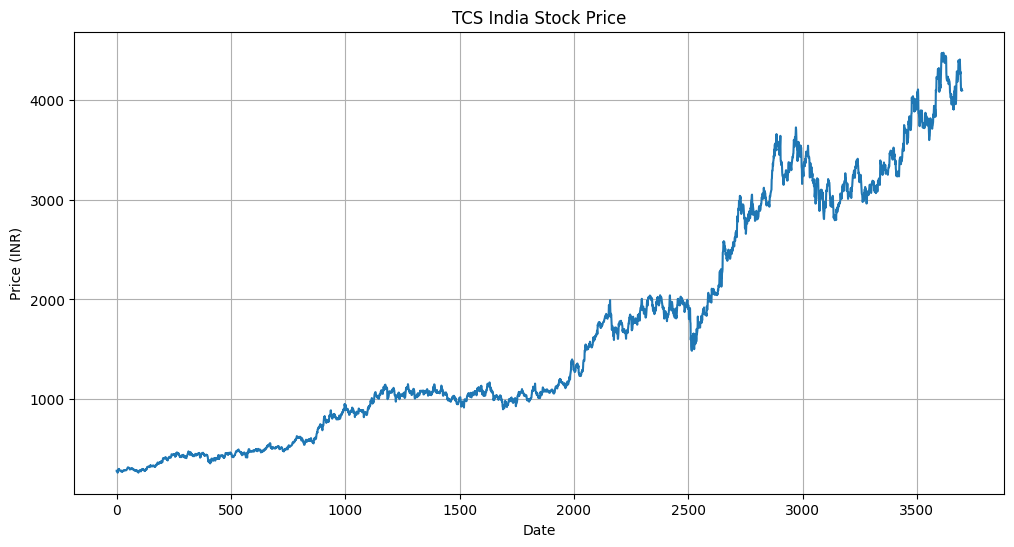

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title("TCS India Stock Price")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()

In [8]:
df

Price,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,283.763763,286.500792,282.782195,284.952941,1963682
1,283.839294,286.746212,281.838437,285.028495,2014488
2,277.421295,283.971298,276.722891,283.839152,3349176
3,269.701141,279.139171,268.417560,277.666829,6474892
4,264.189270,271.248919,262.943455,270.305117,6048178
...,...,...,...,...,...
3694,4093.052979,4150.832124,4050.334053,4134.147890,2195338
3695,4113.920410,4151.816315,4093.052862,4093.052862,1181886
3696,4103.683594,4134.049629,4078.140578,4113.920313,1208464


# Plotting moving averages of 100 day

---



In [9]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,TCS.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3694,4211.700991
3695,4209.779839
3696,4207.640942
3697,4206.580088


Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

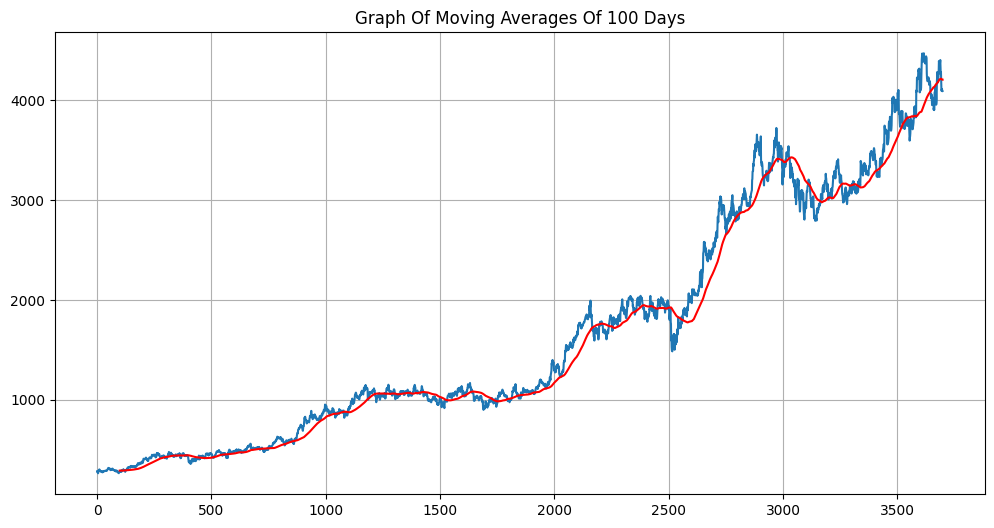

In [10]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.grid(True)
plt.title('Graph Of Moving Averages Of 100 Days')

# Defining 200 days moving averages and plotting comparision graph with 100 days moving averages

---



In [11]:
ma200 = df.Close.rolling(200).mean()
ma200

Ticker,TCS.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3694,4040.072014
3695,4040.727764
3696,4041.335978
3697,4041.989655


Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

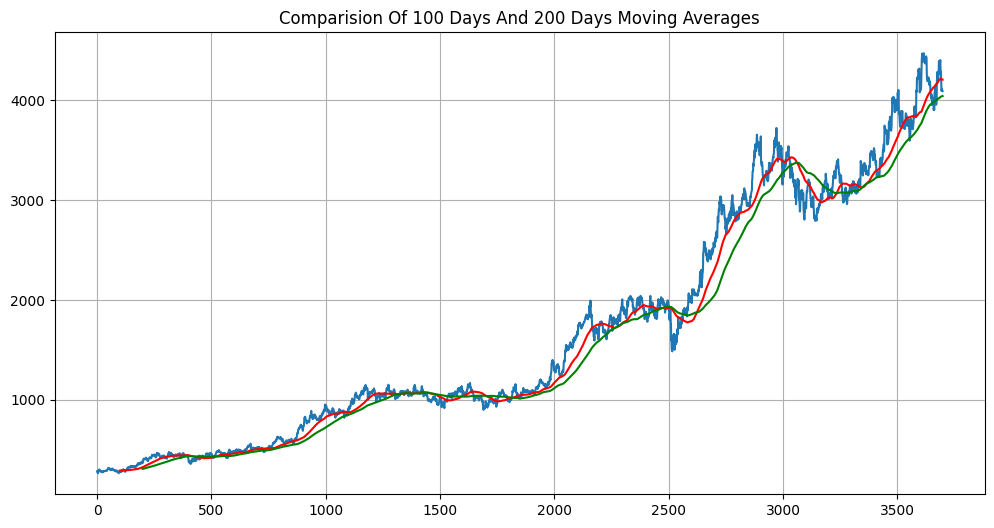

In [12]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.grid(True)
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [13]:
df.shape

(3699, 5)

# Spliting the dataset into training (70%) and testing (30%) set

In [14]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(2589, 6)
(1110, 6)


In [15]:
train.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,2010-01-04,283.763763,286.500792,282.782195,284.952941,1963682
1,2010-01-05,283.839294,286.746212,281.838437,285.028495,2014488
2,2010-01-06,277.421295,283.971298,276.722891,283.839152,3349176
3,2010-01-07,269.701141,279.139171,268.417560,277.666829,6474892
4,2010-01-08,264.189270,271.248919,262.943455,270.305117,6048178


In [16]:
test.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
2589,2020-07-08,2020.169556,2070.698834,2009.881790,2066.692998,2793358
2590,2020-07-09,2006.922729,2043.476701,1994.813868,2029.364922,3443998
2591,2020-07-10,2023.310303,2048.347327,1981.111447,2007.741737,9610320
2592,2020-07-13,2021.170654,2043.886019,2012.066282,2021.170654,2963503
2593,2020-07-14,1977.424316,2038.469184,1971.096821,2012.066501,2976738


# Using MinMax scaler for normalization of the dataset

---



In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [18]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [19]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.01062219],
       [0.01066404],
       [0.0100053 ],
       ...,
       [0.9438499 ],
       [0.964701  ],
       [1.        ]])

In [20]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [21]:
x_train.shape

(2489, 100, 1)

# ML Model (LSTM)

---



In [22]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [23]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

# Training the model

---



In [25]:
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 100)

Epoch 1/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 18s 100ms/step - loss: 0.0761 - mean_absolute_error: 0.1935
Epoch 2/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0096 - mean_absolute_error: 0.0670
Epoch 3/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0068 - mean_absolute_error: 0.0563
Epoch 4/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0073 - mean_absolute_error: 0.0588
Epoch 5/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0058 - mean_absolute_error: 0.0523
Epoch 6/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0063 - mean_absolute_error: 0.0512
Epoch 7/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0052 - mean_absolute_error: 0.0490
Epoch 8/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0052 - mean_absolute_error: 0.0486
Epoch 9/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0055 - mean_absolute_error: 0.0510
Epoch 10/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0045 - mean_absolute_error: 0.0458
Epoch 11/100
78/78 ━━━━━━━━

In [26]:
model.save('keras_model.h5')

In [30]:
test_close.shape

(1110, 1)

In [31]:
past_100_days = pd.DataFrame(train_close[-100:])

In [32]:
test_df = pd.DataFrame(test_close)

**Defining the final dataset for testing by including last 100 coloums of the training dataset to get the prediction from the 1st column of the testing dataset.**

---


In [34]:
final_df = pd.concat([past_100_days, test_df], ignore_index=True)

In [ ]:
final_df.head()

,0
0,2000.000000
1,2016.800049
2,1982.599976
3,1989.750000
4,1994.300049


In [35]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.16630528],
       [0.16686162],
       [0.17333345],
       ...,
       [0.87674074],
       [0.87146325],
       [0.86762503]])

In [36]:
input_data.shape

(1210, 1)

# Testing the model

---



In [37]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [38]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1110, 100, 1)
(1110,)


# Making prediction and plotting the graph of predicted vs actual values

---



In [39]:
# Making predictions

y_pred = model.predict(x_test)

35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step


In [40]:
y_pred.shape

(1110, 1)

In [41]:
y_test

array([0.21149276, 0.19936298, 0.19233651, ..., 0.87674074, 0.87146325,
       0.86762503])

In [42]:
y_pred

array([[0.2362063 ],
       [0.23990592],
       [0.2442278 ],
       ...,
       [0.85588294],
       [0.8440559 ],
       [0.8347396 ]], dtype=float32)

In [43]:
scaler.scale_

array([0.00032495])

In [44]:
scale_factor = 1/0.00041967
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

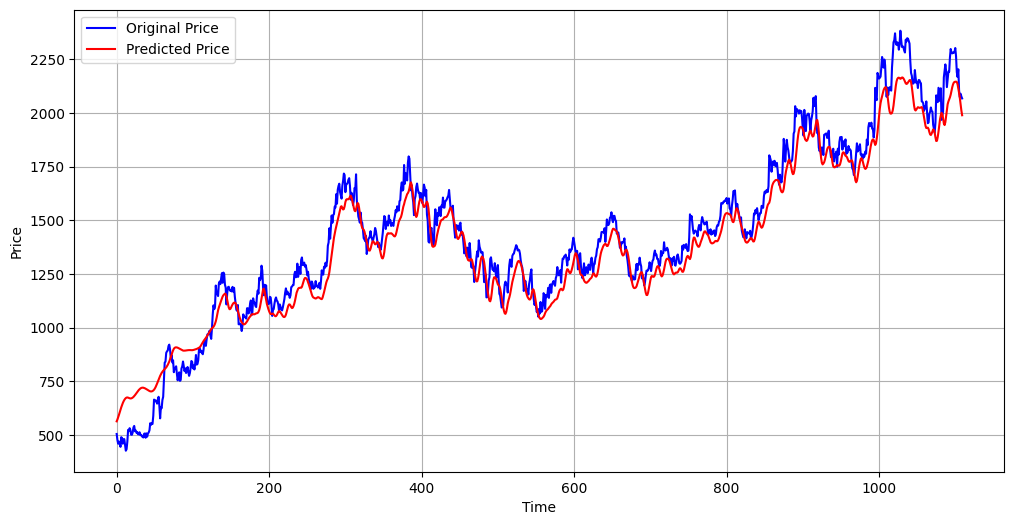

In [45]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Model evaluation

Calculation of mean absolute error

In [52]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse=np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

#mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}".format(mae))


Mean Squared Error (MSE): 9087.994304775779
Root Mean Squared Error (RMSE): 95.33097243171171
Mean absolute error on test set: 77.91


Calculation of R2 score

In [53]:
from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.9458819659635448


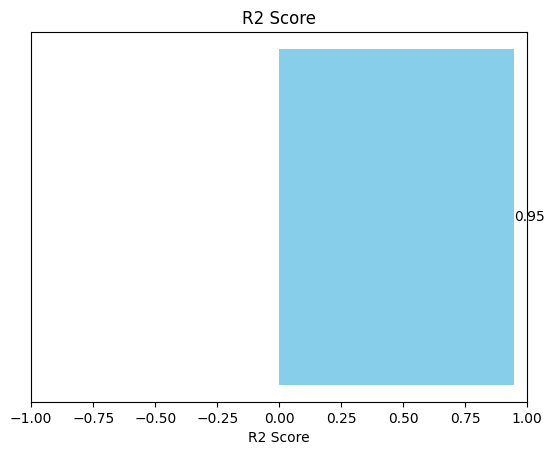

In [54]:
# Plotting the R2 score
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')

# Adding the R2 score value on the bar
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')

plt.show()

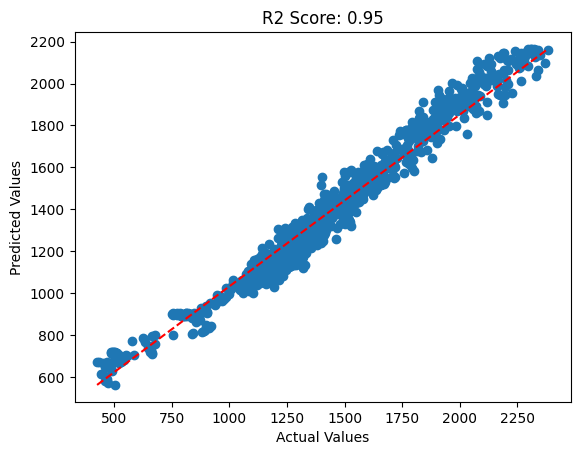

In [50]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()